## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [87]:
# Checking the number of mice.
combined_df[["Mouse ID"]].nunique()

Mouse ID    249
dtype: int64

In [105]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicated_df

duplicateMice = duplicated["Mouse ID"].unique()
print(duplicateMice)

['g989']


In [110]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
clean_df = combined_df[combined_df["Mouse ID"].isin(duplicateMice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [111]:
# Checking the number of mice in the clean DataFrame.
clean_df[["Mouse ID"]].nunique()

Mouse ID    248
dtype: int64

## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
calculate_df = clean_df.groupby("Drug Regimen")
calculate_df.head(5)
meanTumorVolume = calculate_df['Tumor Volume (mm3)'].mean()
medianTumorVolume = calculate_df['Tumor Volume (mm3)'].median()
varianceTumorVolume = calculate_df['Tumor Volume (mm3)'].var()
stdTumorVolume = calculate_df['Tumor Volume (mm3)'].std()
semTumorVolume = calculate_df['Tumor Volume (mm3)'].sem()

In [121]:
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Tumor Volume Mean": meanTumorVolume,"Tumor Volume Median": medianTumorVolume,"Tumor Volume Variance": varianceTumorVolume,
                           "Tumor Volume Standard Deviation": stdTumorVolume})
summary_df = summary_df.reset_index() 
summary_df
# Using the aggregation method, produce the same summary statistics in a single line
final_summary_df = calculate_df.agg({'Tumor Volume (mm3)': ['mean', 'median','var','std','sem']})
final_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Treatments')

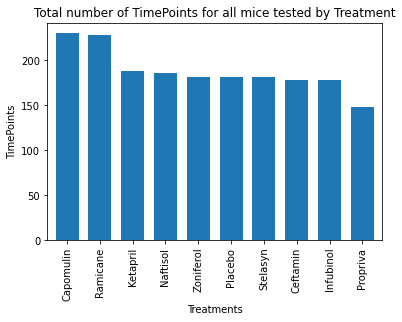

In [147]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timePoint_df = clean_df['Drug Regimen'].value_counts()
timePoint_df
bp = timePoint_df.plot.bar(width=0.7, zorder=3, title = "Total number of TimePoints for all mice tested by Treatment")
bp.set_ylabel("TimePoints")
bp.set_xlabel("Treatments")

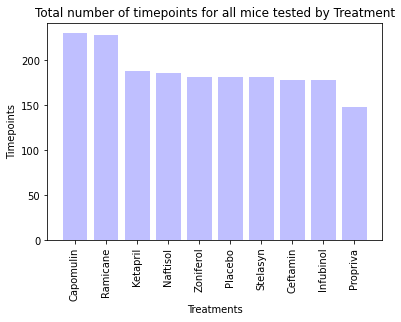

In [120]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug = clean_df["Drug Regimen"].value_counts()
timepoints = clean_df["Timepoint"]
plt.bar(drug.index.values, drug.values, color='b', alpha= 0.25, align="center")
plt.xticks(rotation = 90)
plt.ylabel("Timepoints")
plt.xlabel("Treatments")
plt.title("Total number of timepoints for all mice tested by Treatment")
plt.show()

<AxesSubplot:title={'center':'Distribution of Female versus Male mice'}, ylabel='Sex'>

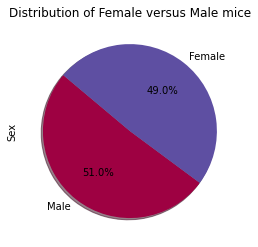

In [170]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df["Sex"].value_counts().plot.pie(autopct="%1.1f%%", shadow=True, startangle=140, title = "Distribution of Female versus Male mice", colormap = "Spectral" )

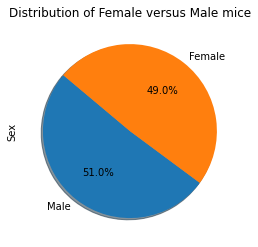

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution = clean_df["Sex"].value_counts()
labels = distribution.index.values
plt.pie(distribution, labels = labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.ylabel("Sex")
plt.title("Distribution of Female versus Male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
maxTimepoint_df = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
maxTimepoint_df = maxTimepoint_df.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(clean_df, maxTimepoint_df, on= ["Mouse ID", "Timepoint"], how = "right")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [137]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
volumes = []
regimens = []
 # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    volume_df = merge_df.loc[merge_df["Drug Regimen"] == treatment, :]
    volumes.append(volume_df["Tumor Volume (mm3)"])
    regimens.append(volume_df["Drug Regimen"])
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volume_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The lower quartile of {treatment} TumorVolume is: {lowerq}")
    print(f"The upper quartile of {treatment} TumorVolume is: {upperq}")
    print(f"The interquartile range of {treatment} TumorVolume is: {iqr}")
    print(f"The the median of {treatment} TumorVolume is: {quartiles[0.5]}")
    print(f"TumorVolume below {lower_bound} could be outliers.")
    print(f"TumorVolume {upper_bound} could be outliers.")
    print(f"-----------------------------------------------------------")

The lower quartile of Capomulin TumorVolume is: 32.37735684
The upper quartile of Capomulin TumorVolume is: 40.1592203
The interquartile range of Capomulin TumorVolume is: 7.781863460000004
The the median of Capomulin TumorVolume is: 38.1251644
TumorVolume below 20.70456164999999 could be outliers.
TumorVolume 51.83201549 could be outliers.
-----------------------------------------------------------
The lower quartile of Ramicane TumorVolume is: 31.56046955
The upper quartile of Ramicane TumorVolume is: 40.65900627
The interquartile range of Ramicane TumorVolume is: 9.098536719999998
The the median of Ramicane TumorVolume is: 36.56165229
TumorVolume below 17.912664470000003 could be outliers.
TumorVolume 54.30681135 could be outliers.
-----------------------------------------------------------
The lower quartile of Infubinol TumorVolume is: 54.04860769
The upper quartile of Infubinol TumorVolume is: 65.52574285
The interquartile range of Infubinol TumorVolume is: 11.477135160000003
The

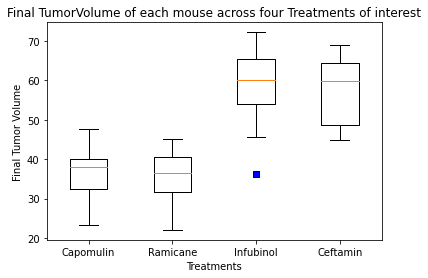

In [142]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier = dict(markerfacecolor='b', marker='s')
plt.boxplot(volumes, labels = treatments, flierprops=outlier)
plt.ylabel("Final Tumor Volume")
plt.xlabel("Treatments")
plt.title("Final TumorVolume of each mouse across four Treatments of interest")
plt.show()

## Line and Scatter Plots

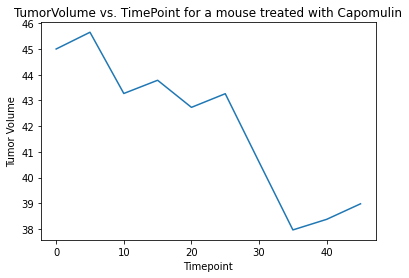

In [160]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin =  clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
Mouse = Capomulin.loc[Capomulin["Mouse ID"] == "b128"]
ly = Mouse["Tumor Volume (mm3)"]
lx = Mouse["Timepoint"]
plt.plot(lx, ly)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("TumorVolume vs. TimePoint for a mouse treated with Capomulin")
plt.show()


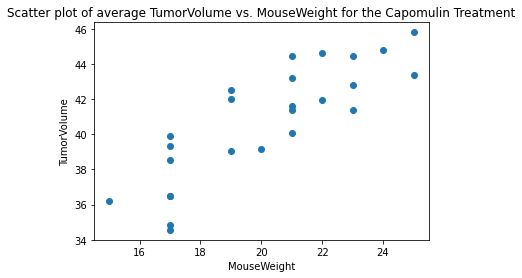

In [159]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
CapomulinAvgTumorVolume = Capomulin.groupby(["Mouse ID"]).mean()
sy = CapomulinAvgTumorVolume["Tumor Volume (mm3)"]
sx = CapomulinAvgTumorVolume["Weight (g)"]
plt.scatter(sx, sy)
plt.xlabel("MouseWeight")
plt.ylabel("TumorVolume")
plt.title("Scatter plot of average TumorVolume vs. MouseWeight for the Capomulin Treatment")
plt.show()

## Correlation and Regression

Correlation Values are: (0.8419363424694717, 1.322572243471279e-07)


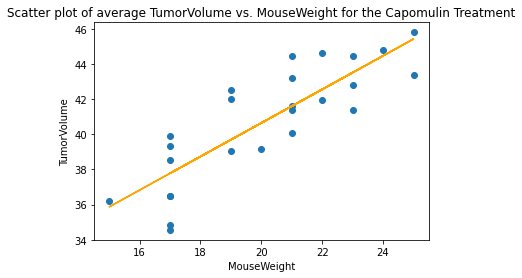

In [180]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(sx,sy)
print("Correlation Values are:", correlation)
regress_values = st.linregress(sx,sy)
y_values = sx*regress_values[0]+regress_values[1]
plt.plot(sx, y_values, color = "orange")
plt.scatter(sx, sy)
plt.xlabel("MouseWeight")
plt.ylabel("TumorVolume")
plt.title("Scatter plot of average TumorVolume vs. MouseWeight for the Capomulin Treatment")
plt.show()